## Python version of all the results in Brain Lateralization Project
Author: Yile Wang  
Date: 02/13/2023

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
import statsmodels
import sys
sys.path.insert(0, '/Users/yat-lok/workspaces/tvbtools')
from tools.statools import stats_calculator

['/Users/yat-lok/workspaces/tvbtools', '/home/yat-lok/workspaces/tvbtools', '/Users/yat-lok/workspaces/tvbdemos/lab_record', '/Users/yat-lok/.vscode/extensions/ms-toolsai.jupyter-2022.11.1003412109/pythonFiles', '/Users/yat-lok/.vscode/extensions/ms-toolsai.jupyter-2022.11.1003412109/pythonFiles/lib/python', '/Users/yat-lok/miniconda3/envs/tvbenv/lib/python310.zip', '/Users/yat-lok/miniconda3/envs/tvbenv/lib/python3.10', '/Users/yat-lok/miniconda3/envs/tvbenv/lib/python3.10/lib-dynload', '', '/Users/yat-lok/miniconda3/envs/tvbenv/lib/python3.10/site-packages']


In [4]:
## Read data
freq3mins = pd.read_excel('../../data4project/lateralization/gc3mins/freqres.xlsx')
amp3mins = pd.read_excel('../../data4project/lateralization/gc3mins/ampres.xlsx')
delay3mins = pd.read_excel('../../data4project/lateralization/gc3mins/delayres.xlsx')
la3mins = pd.read_excel('../../data4project/lateralization/gc3mins/la3mins.xlsx')
colorcoding = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
order = ['SNC', 'NC', 'MCI', 'AD']
pairs = [('SNC', 'AD'),('NC', 'AD'), ('MCI', 'AD'), ('SNC', 'MCI'), ('NC', 'MCI'), ('SNC', 'NC')]


In [5]:
stats_freq = stats_calculator(datatable=freq3mins, asterisk=False)

In [6]:
stats_amp = stats_calculator(datatable=amp3mins, asterisk=False)

In [7]:
stats_delay = stats_calculator(datatable=delay3mins, tails='less', asterisk=False)

In [8]:
stats_la = stats_calculator(datatable=la3mins, tails='less', asterisk=False)
test_short_name = 'permutation_FDR'

In [9]:
alist = np.array([1,2,3,4,5])
ac = np.where(np.array(alist)<3)[0]
alist[ac].tolist()

[1, 2]

In [28]:
### violin plot visualization
def violin_dot(data, x, y, stats_table, test_short_name=test_short_name, xlabel = 'Group', ylabel='Count', pairs=pairs, order=order,):
    pvalues = np.array([stats_table[pairs[i]][y] for i in range(len(pairs))])
    sig_indices = np.where(np.array(pvalues)<0.05)[0]
    fig, ax = plt.subplots(figsize=(7,4), dpi=300)
    sns.set_style("white")#sns.set_theme()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.tick_params(left=False, bottom=False) #remove ticks
    sns.violinplot(data = data, x=x, y = y, inner=None, bw=.4, palette=colorcoding, linewidth=3, alpha = 1)
    sns.stripplot(data = data, x=x, y=y, edgecolor="black", linewidth=2, palette=colorcoding, alpha = 0.7, zorder=1)
    sns.pointplot(data=data, x = x, y=y, estimator=np.mean, color="red", ci = None, edgecolor='red', join=False, markers='s', alpha=1)
    if len(sig_indices) > 0:
        sig_pvalues = pvalues[sig_indices].tolist()
        sig_pairs = [pairs[i] for i in sig_indices]
        annotator = Annotator(ax, pairs=sig_pairs, data=data, x=x, y=y, order=order, plot='violinplot')
        (annotator.configure(test=None, test_short_name=test_short_name).set_pvalues(pvalues=sig_pvalues).annotate())
    plt.xlabel(y)
    plt.ylabel(ylabel)
    

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NC vs. AD: Custom statistical test, P_val:4.020e-02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MCI vs. AD: Custom statistical test, P_val:5.999e-04


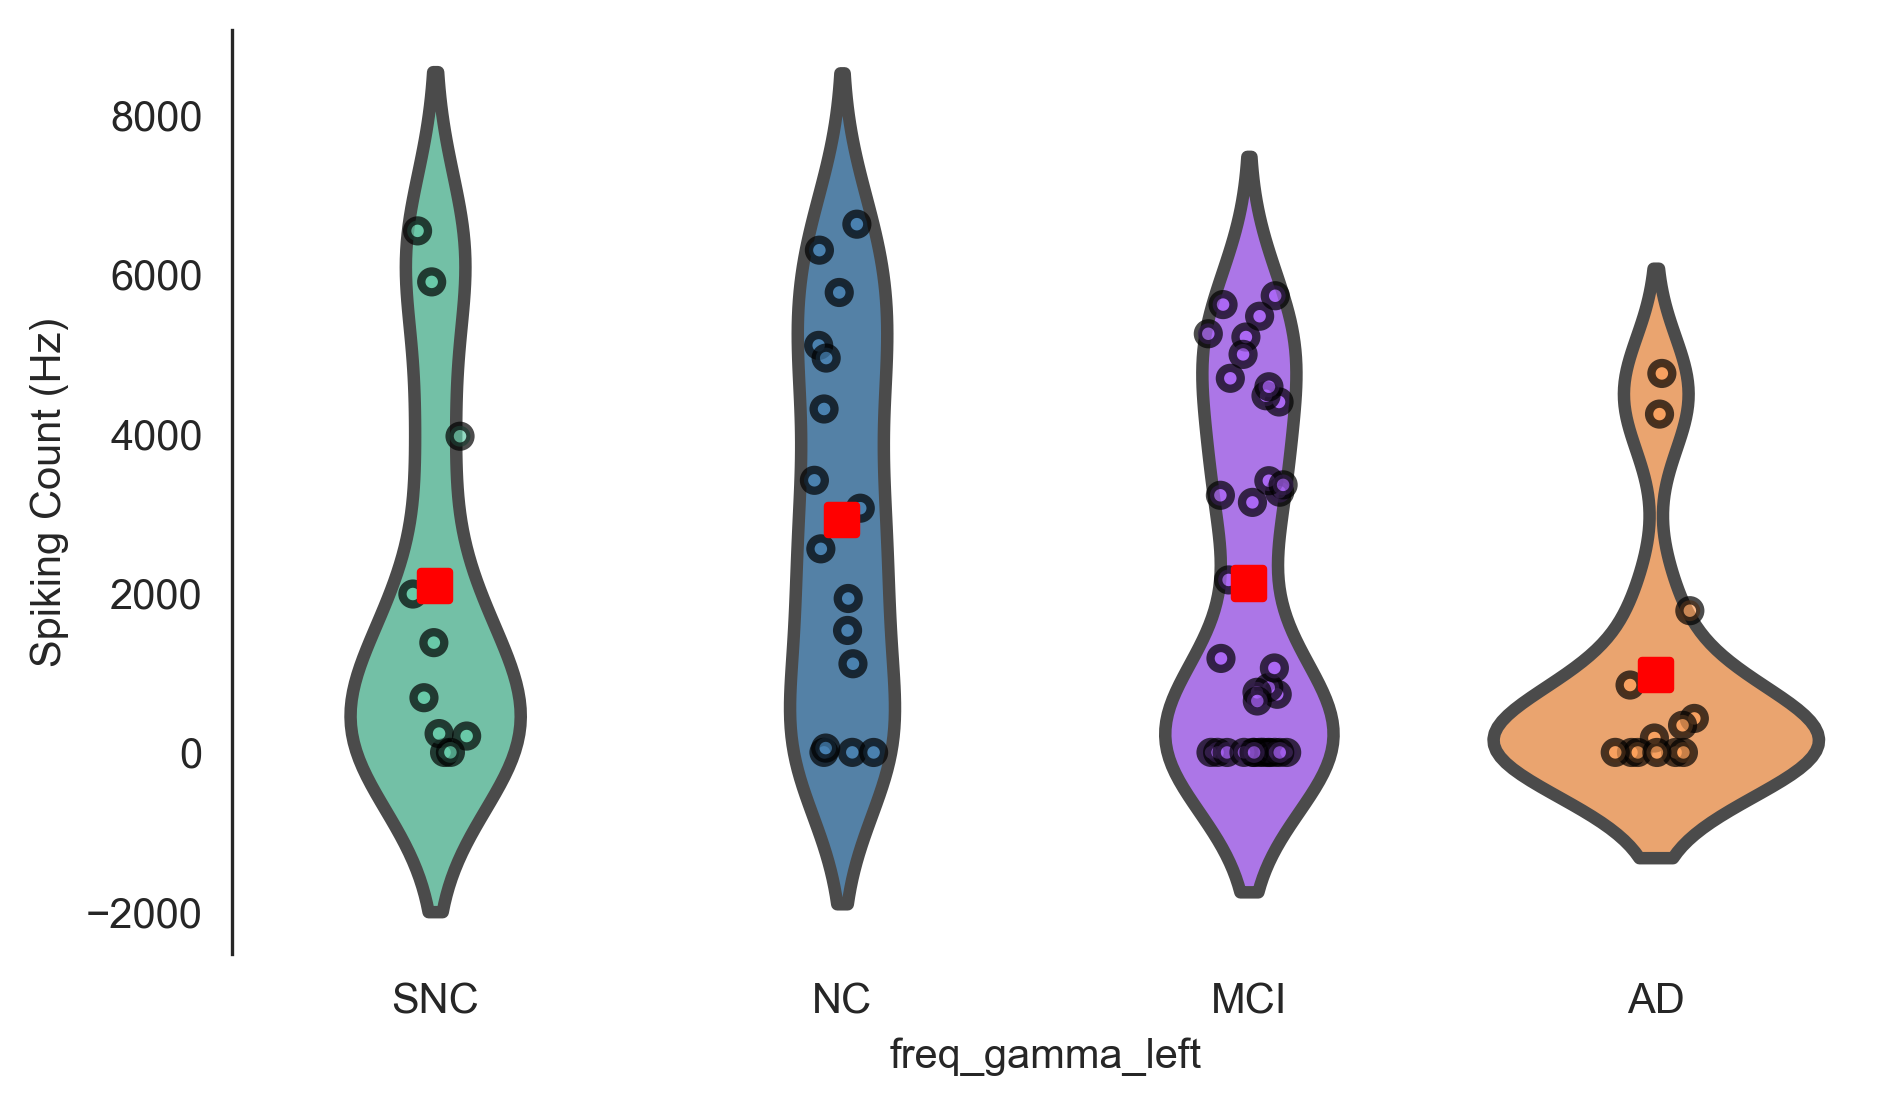

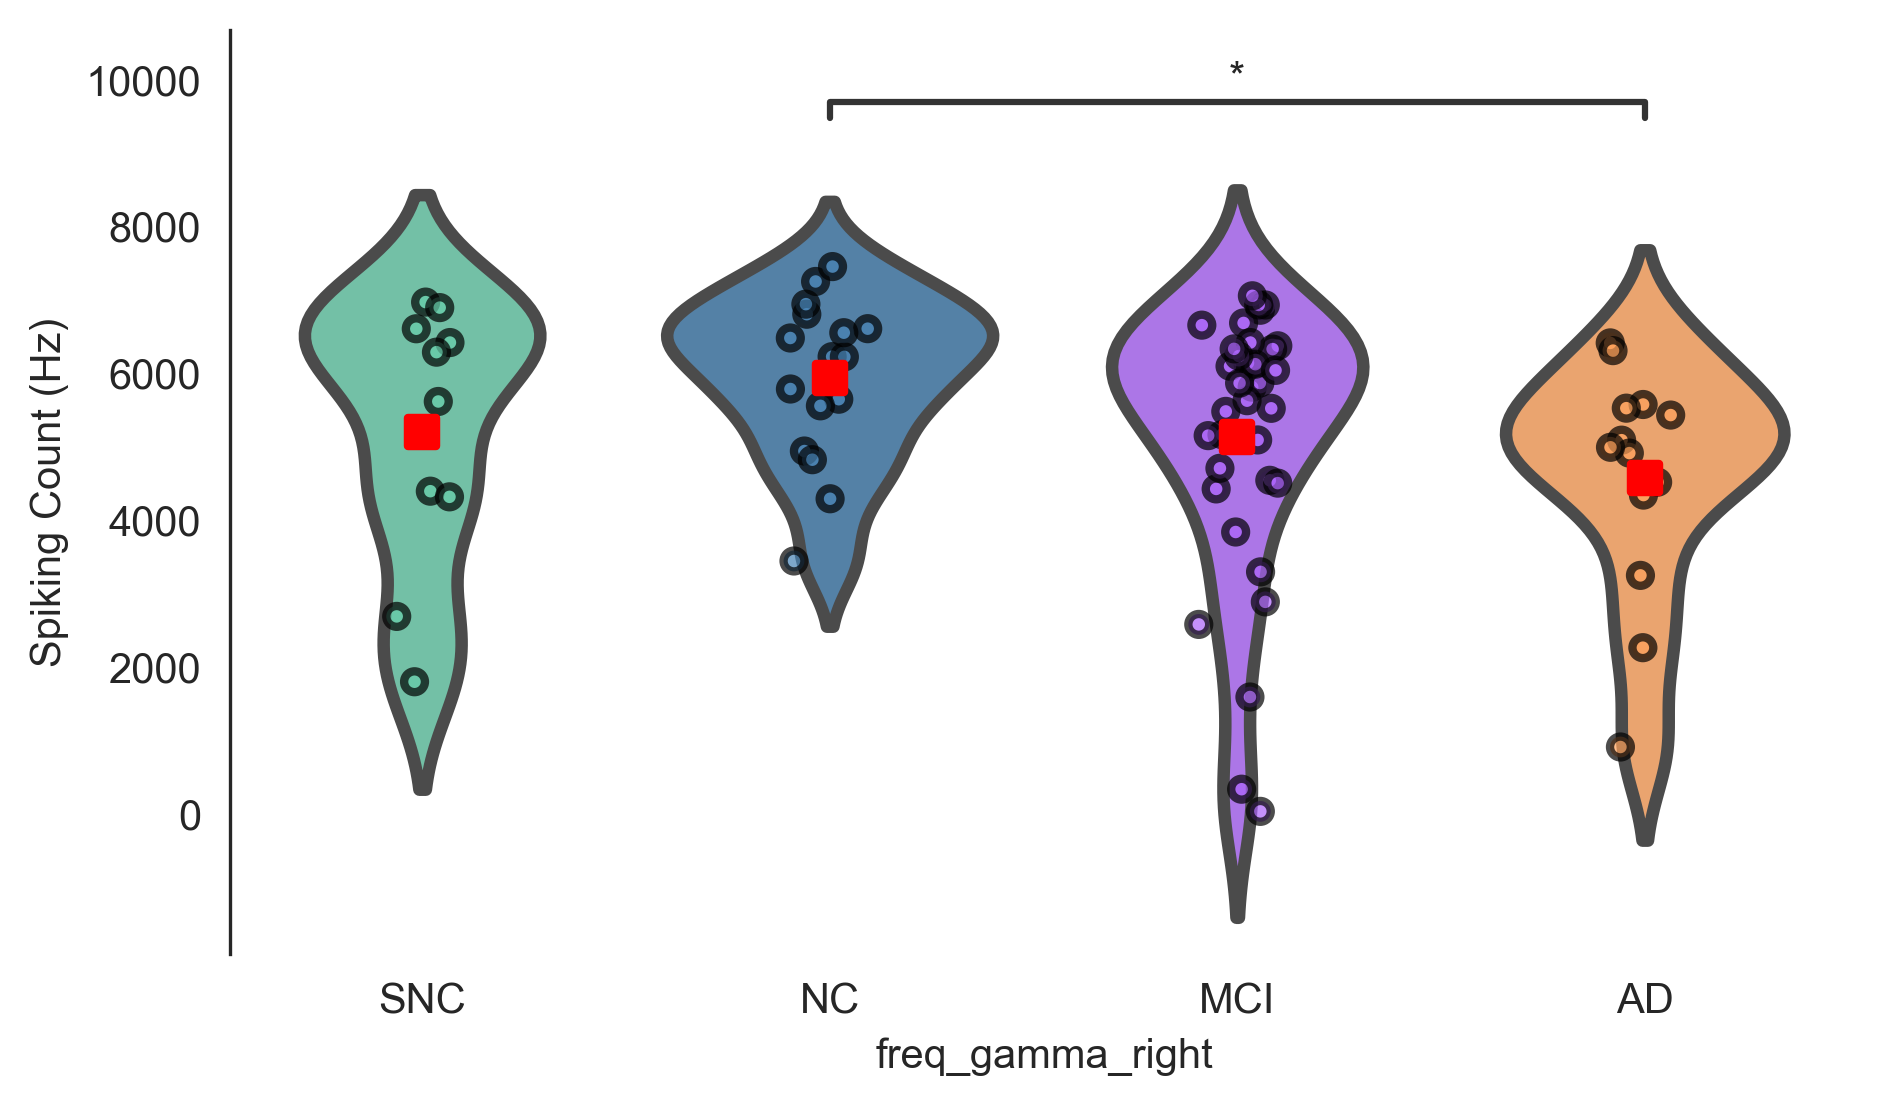

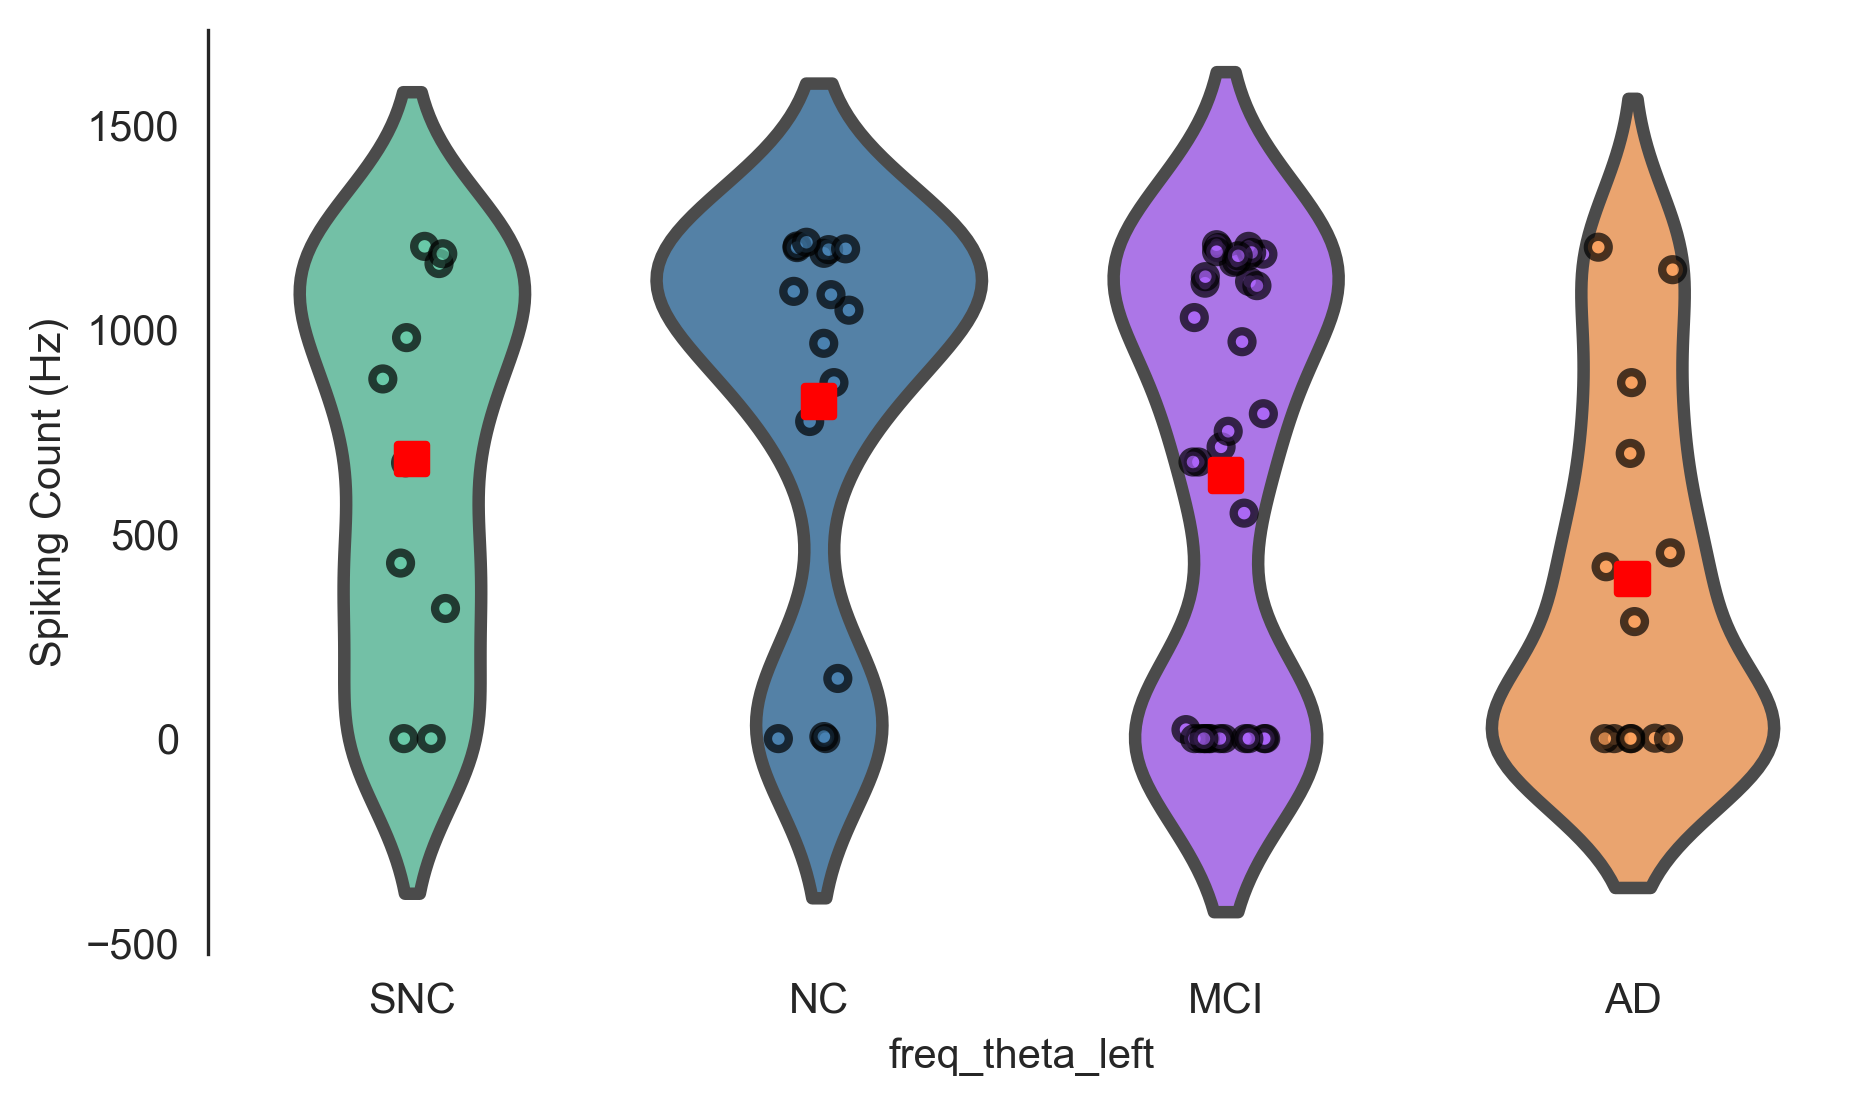

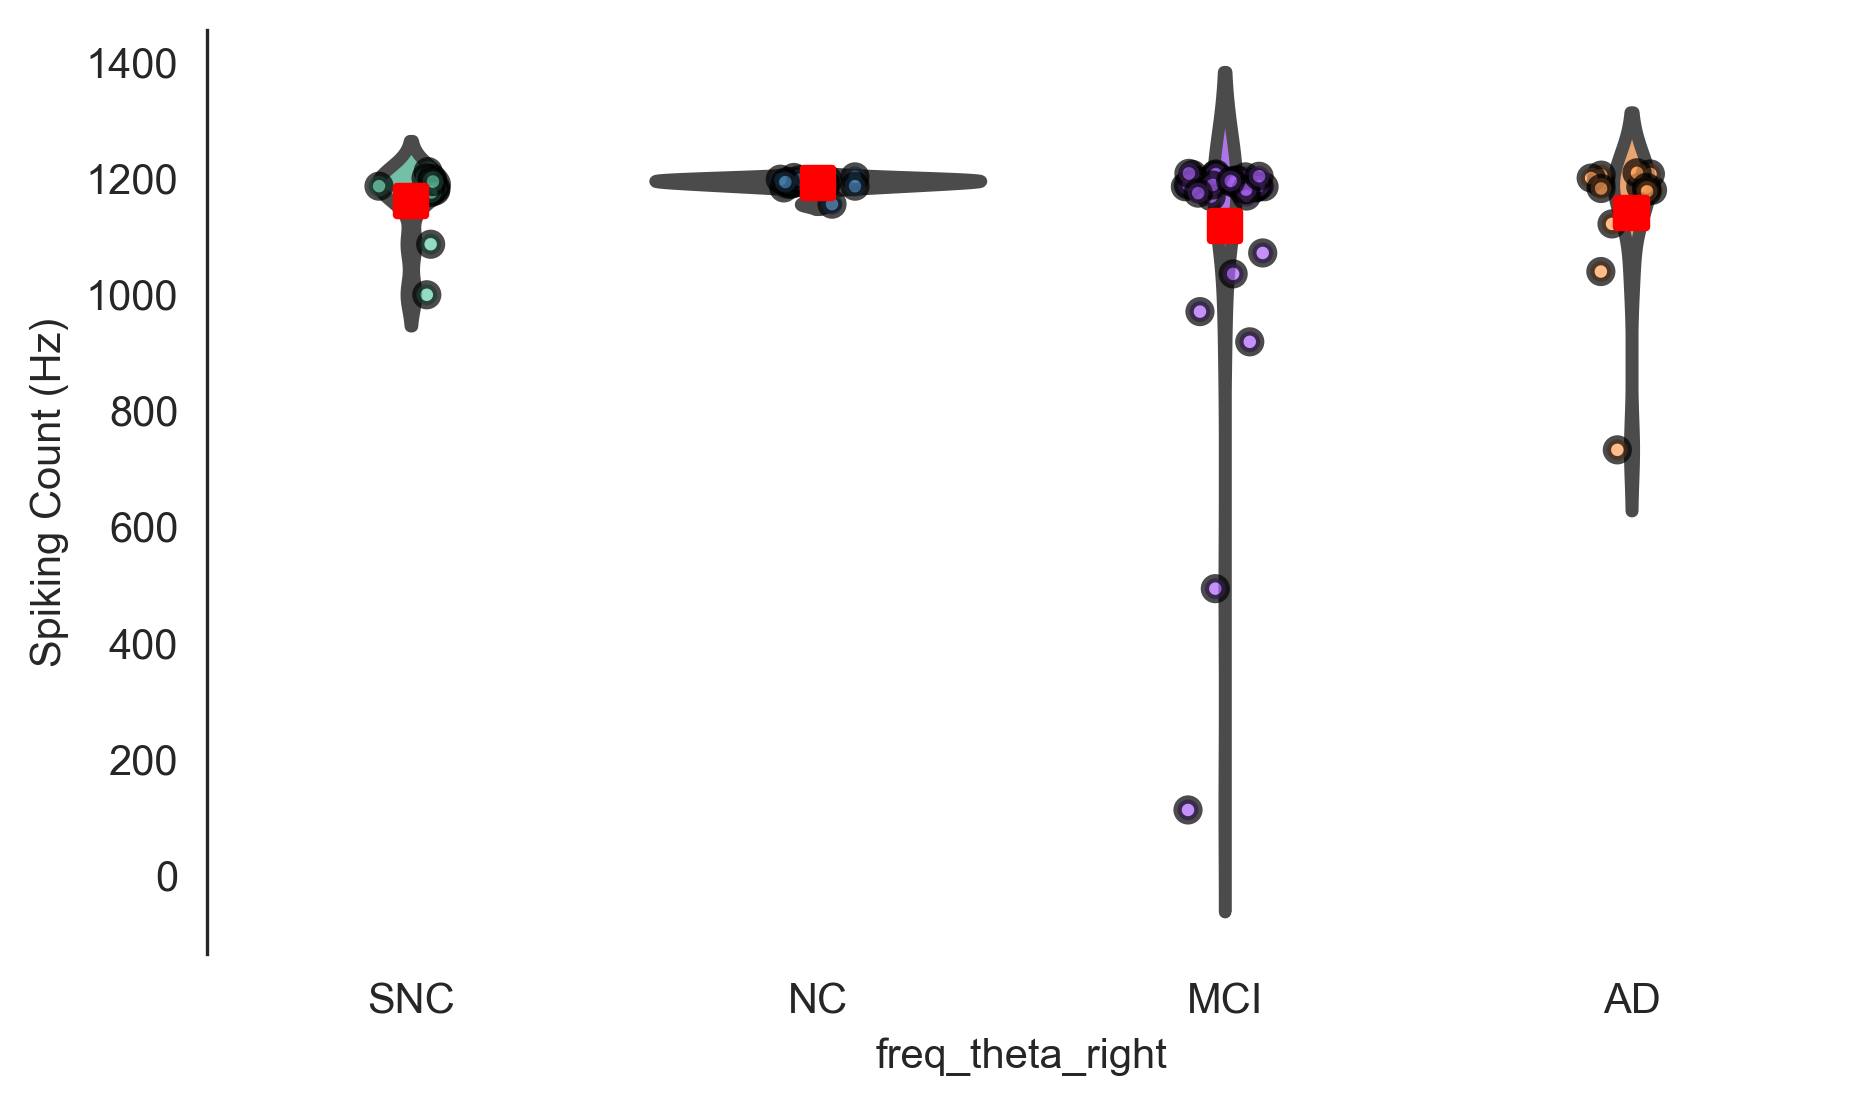

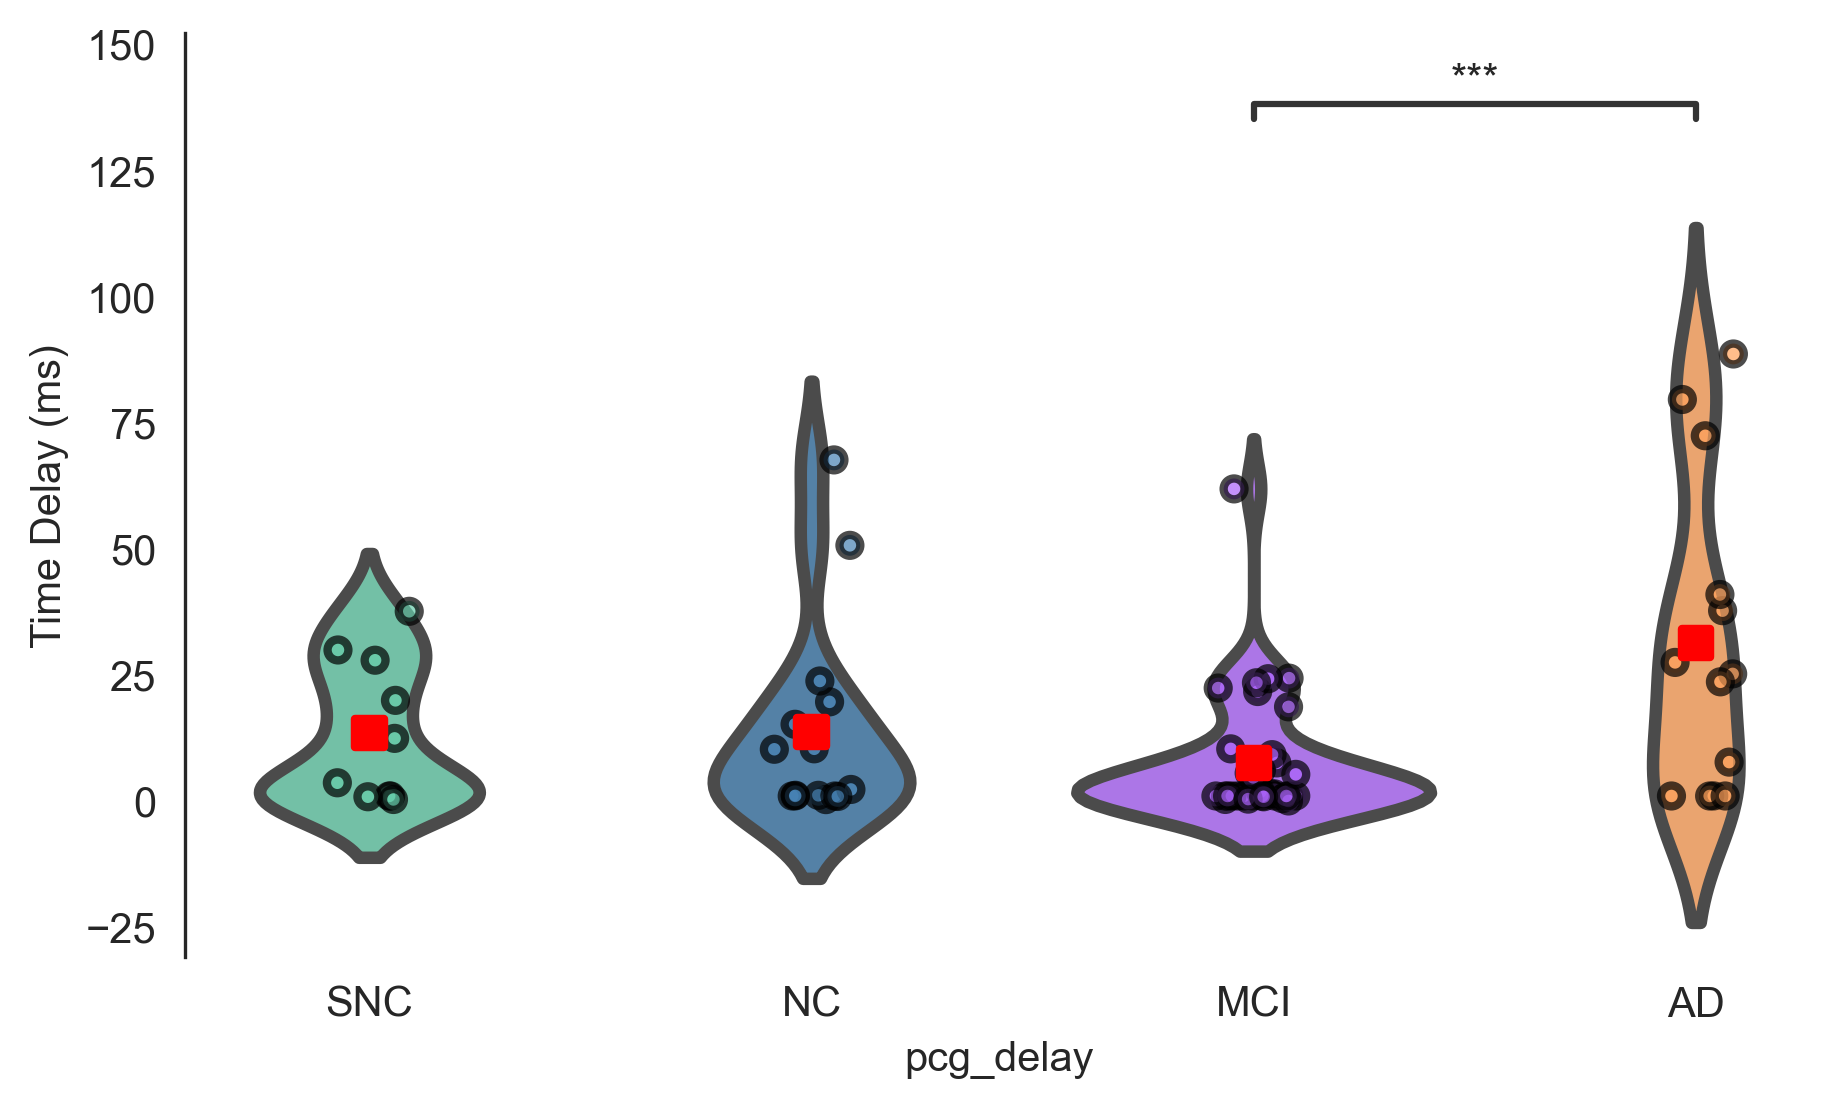

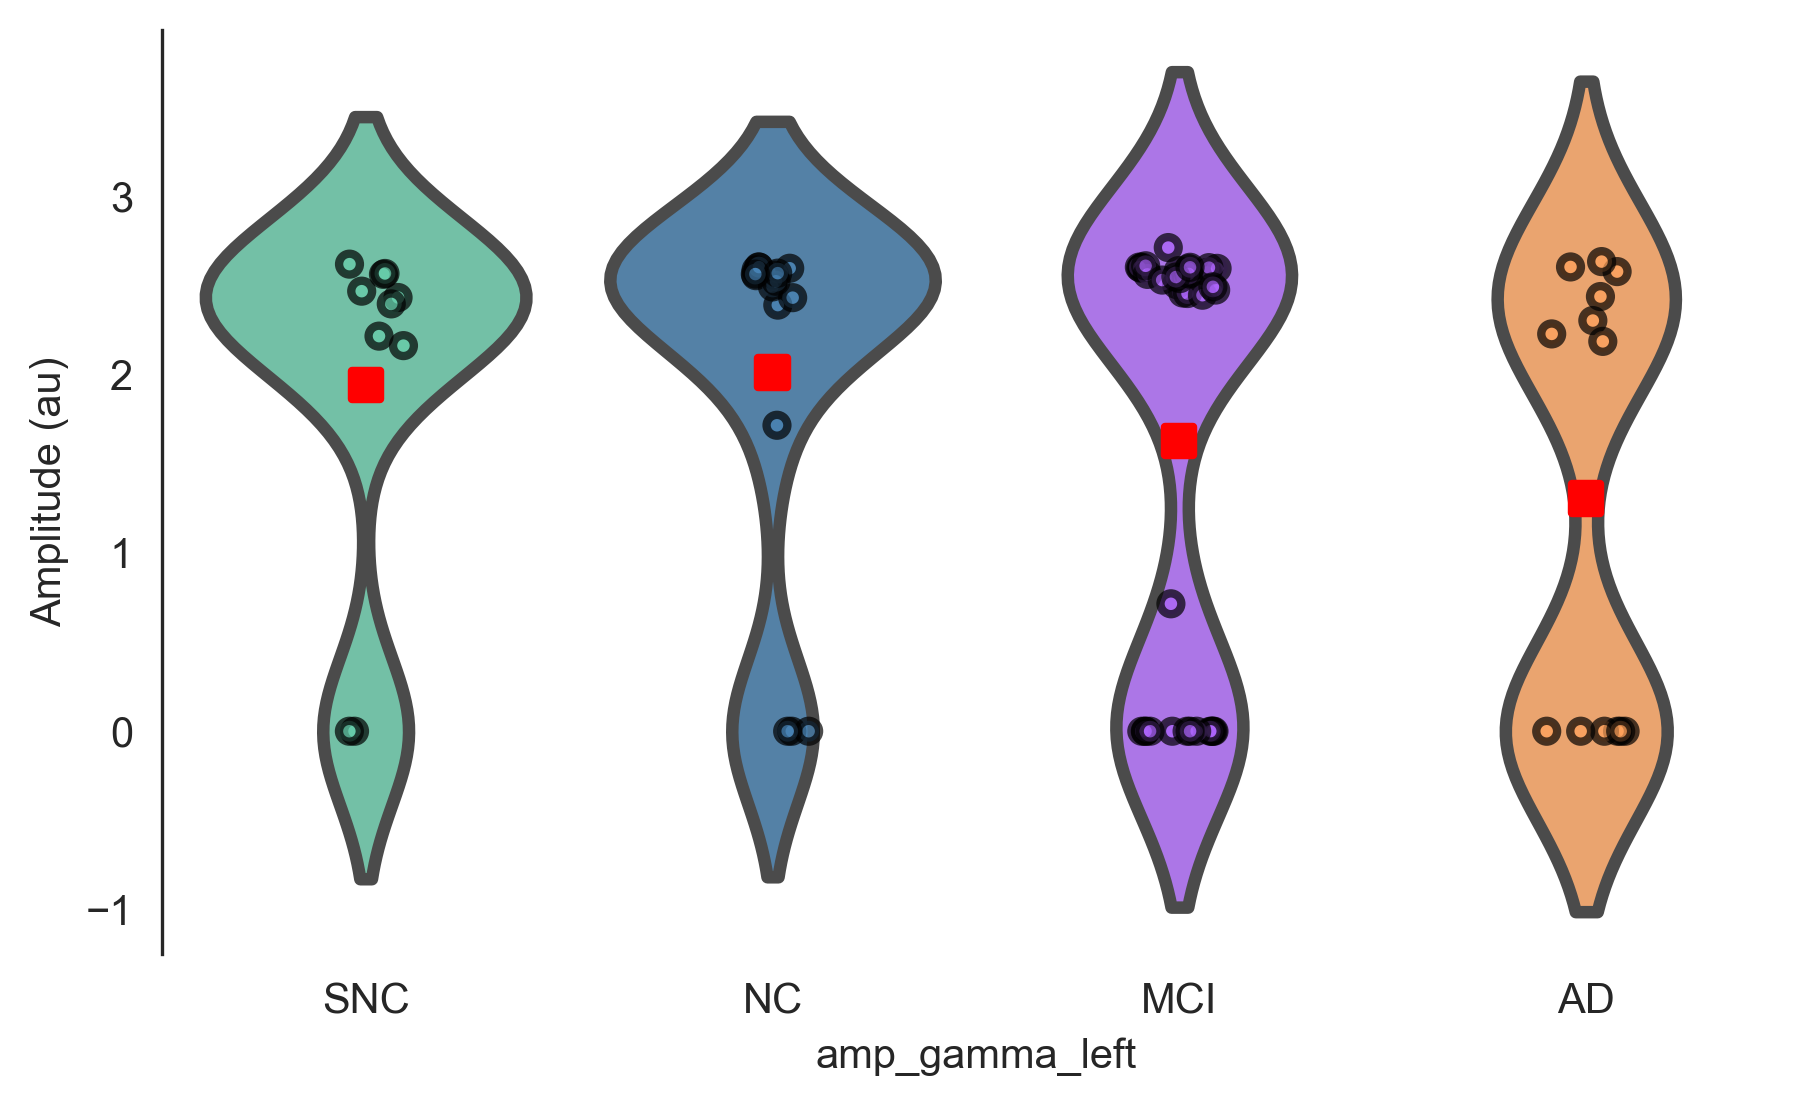

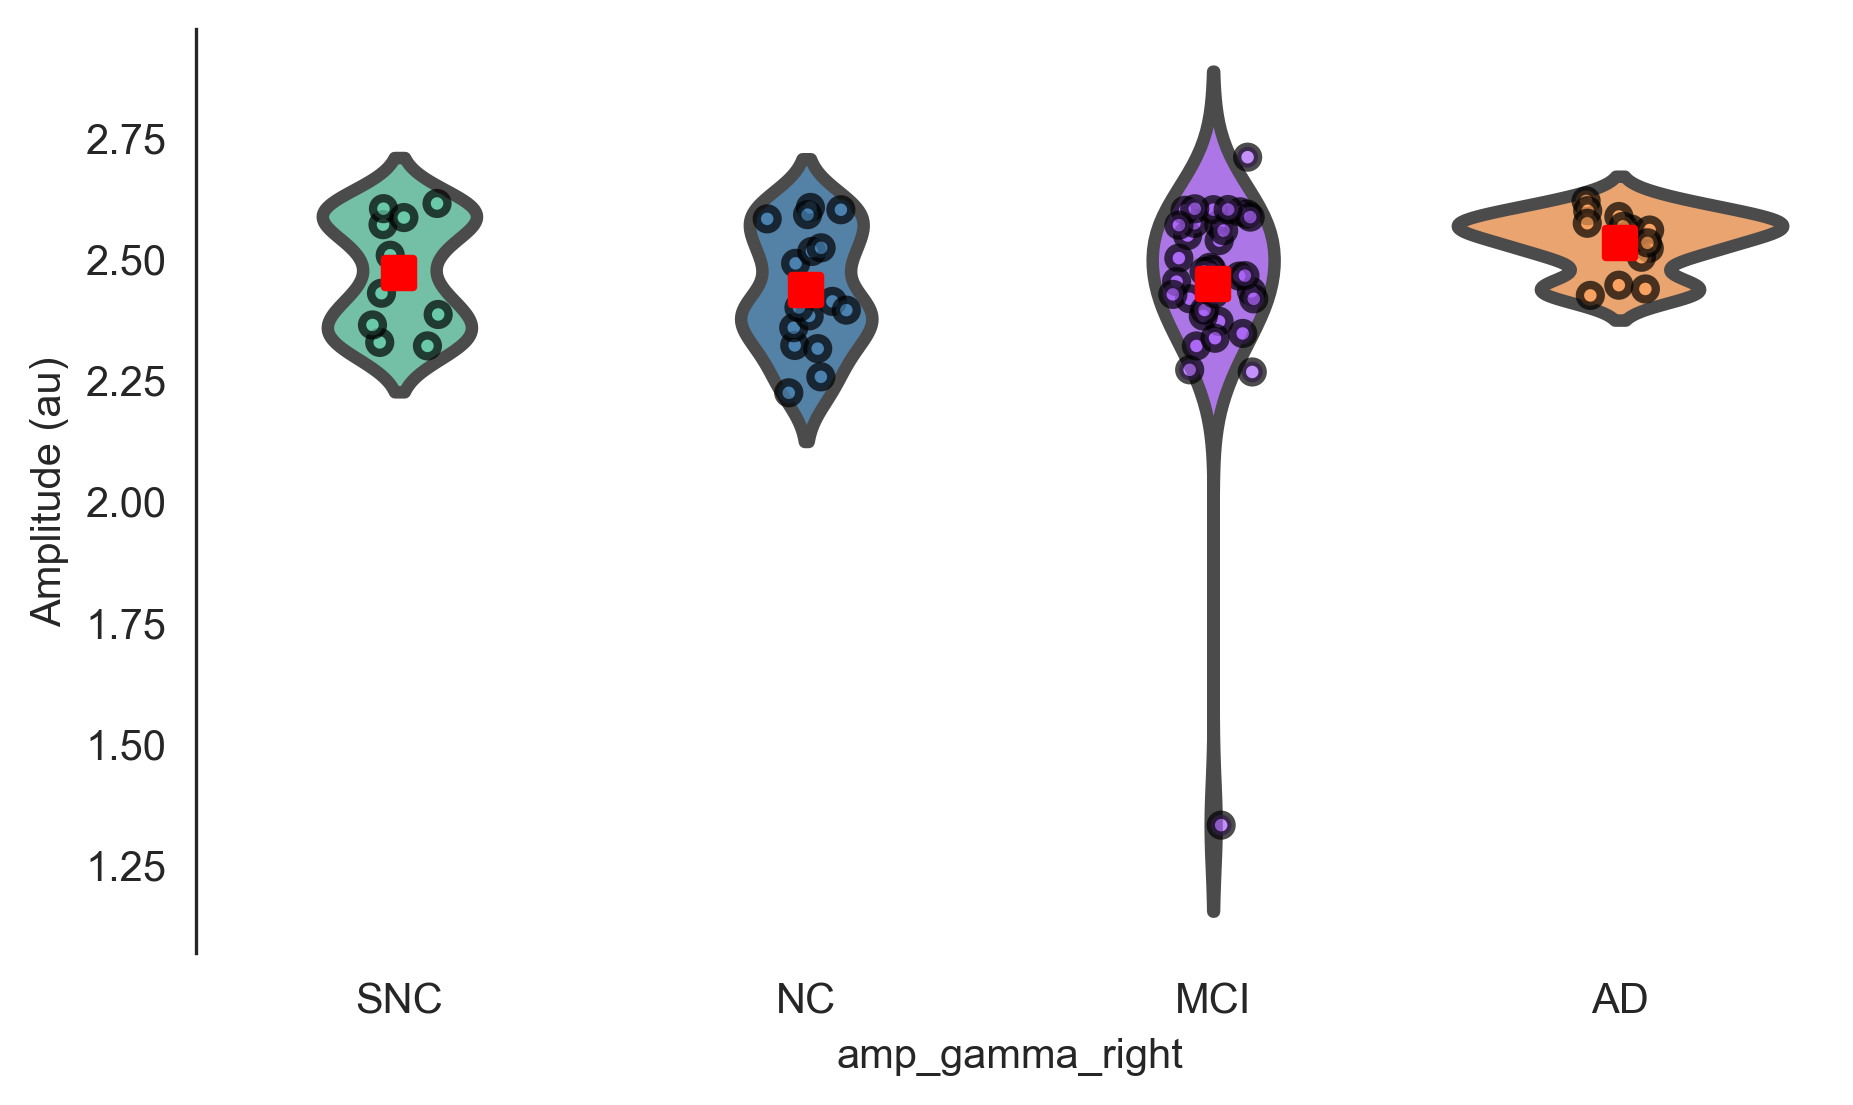

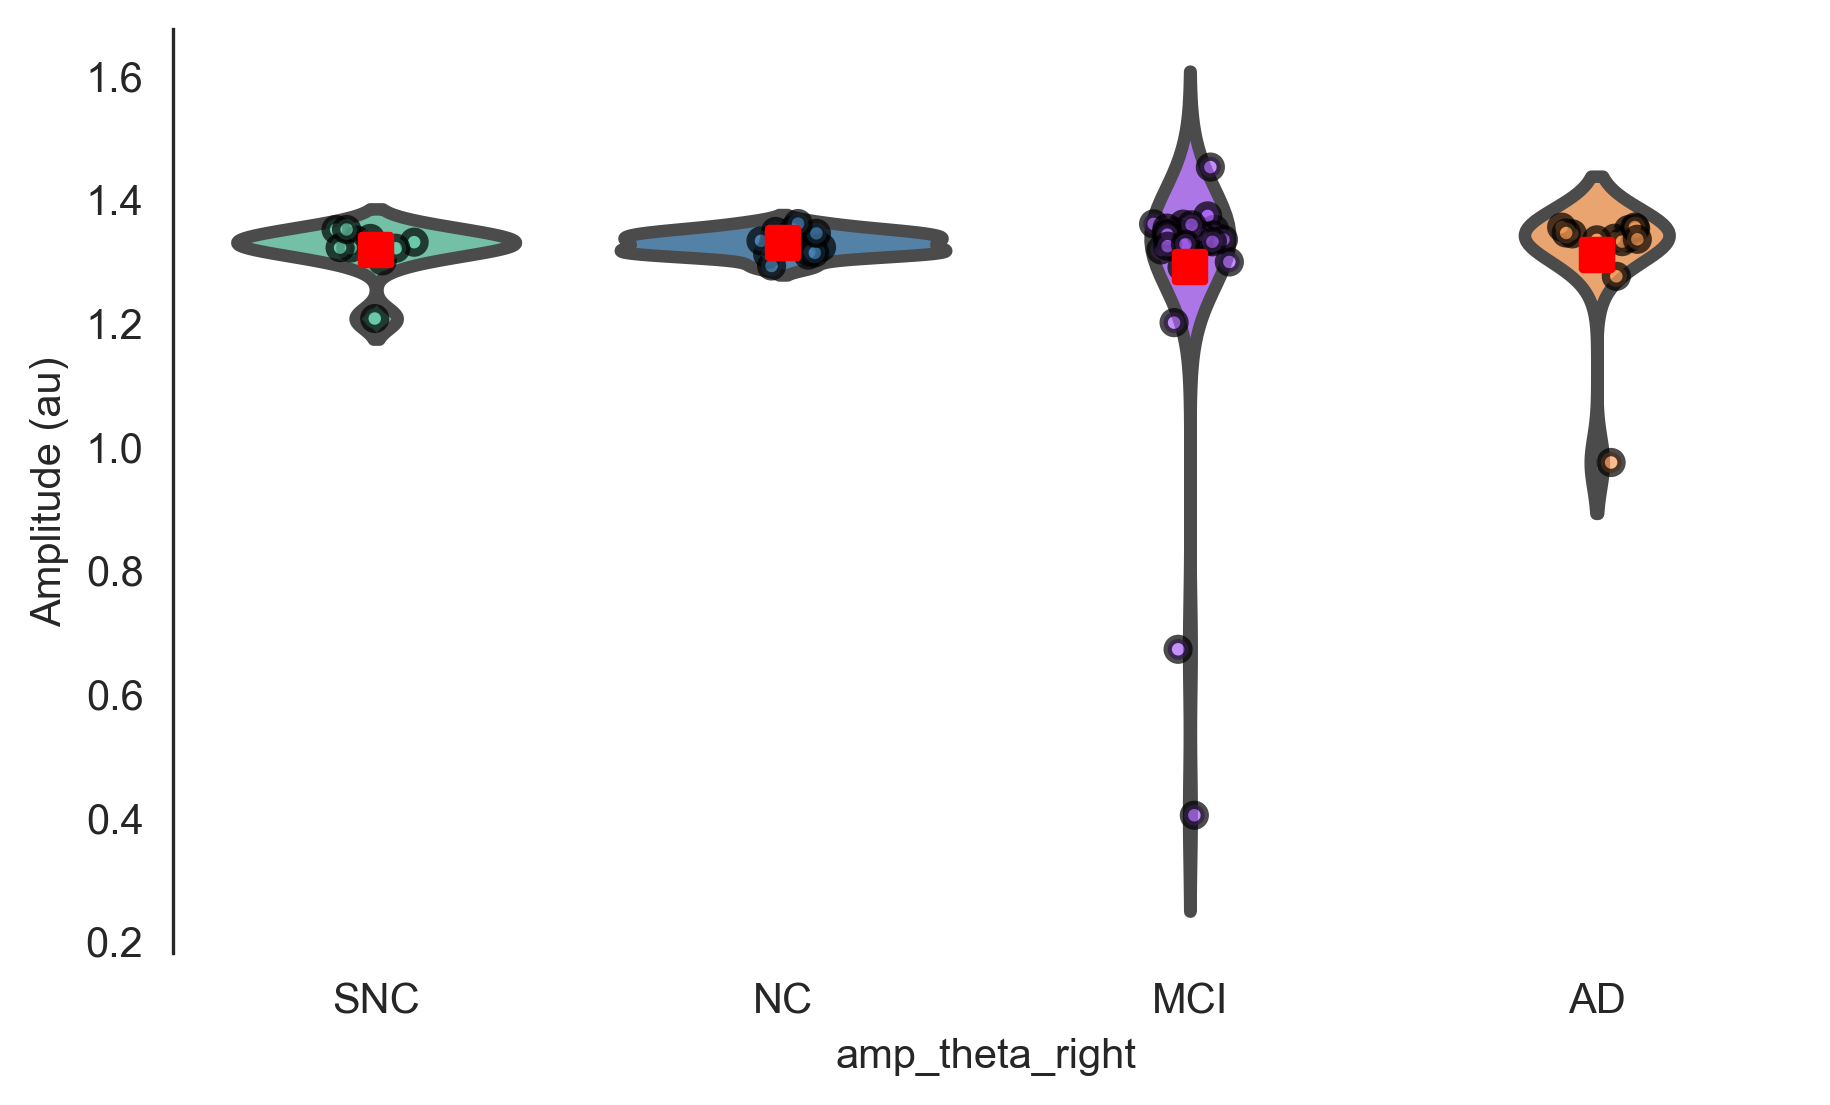

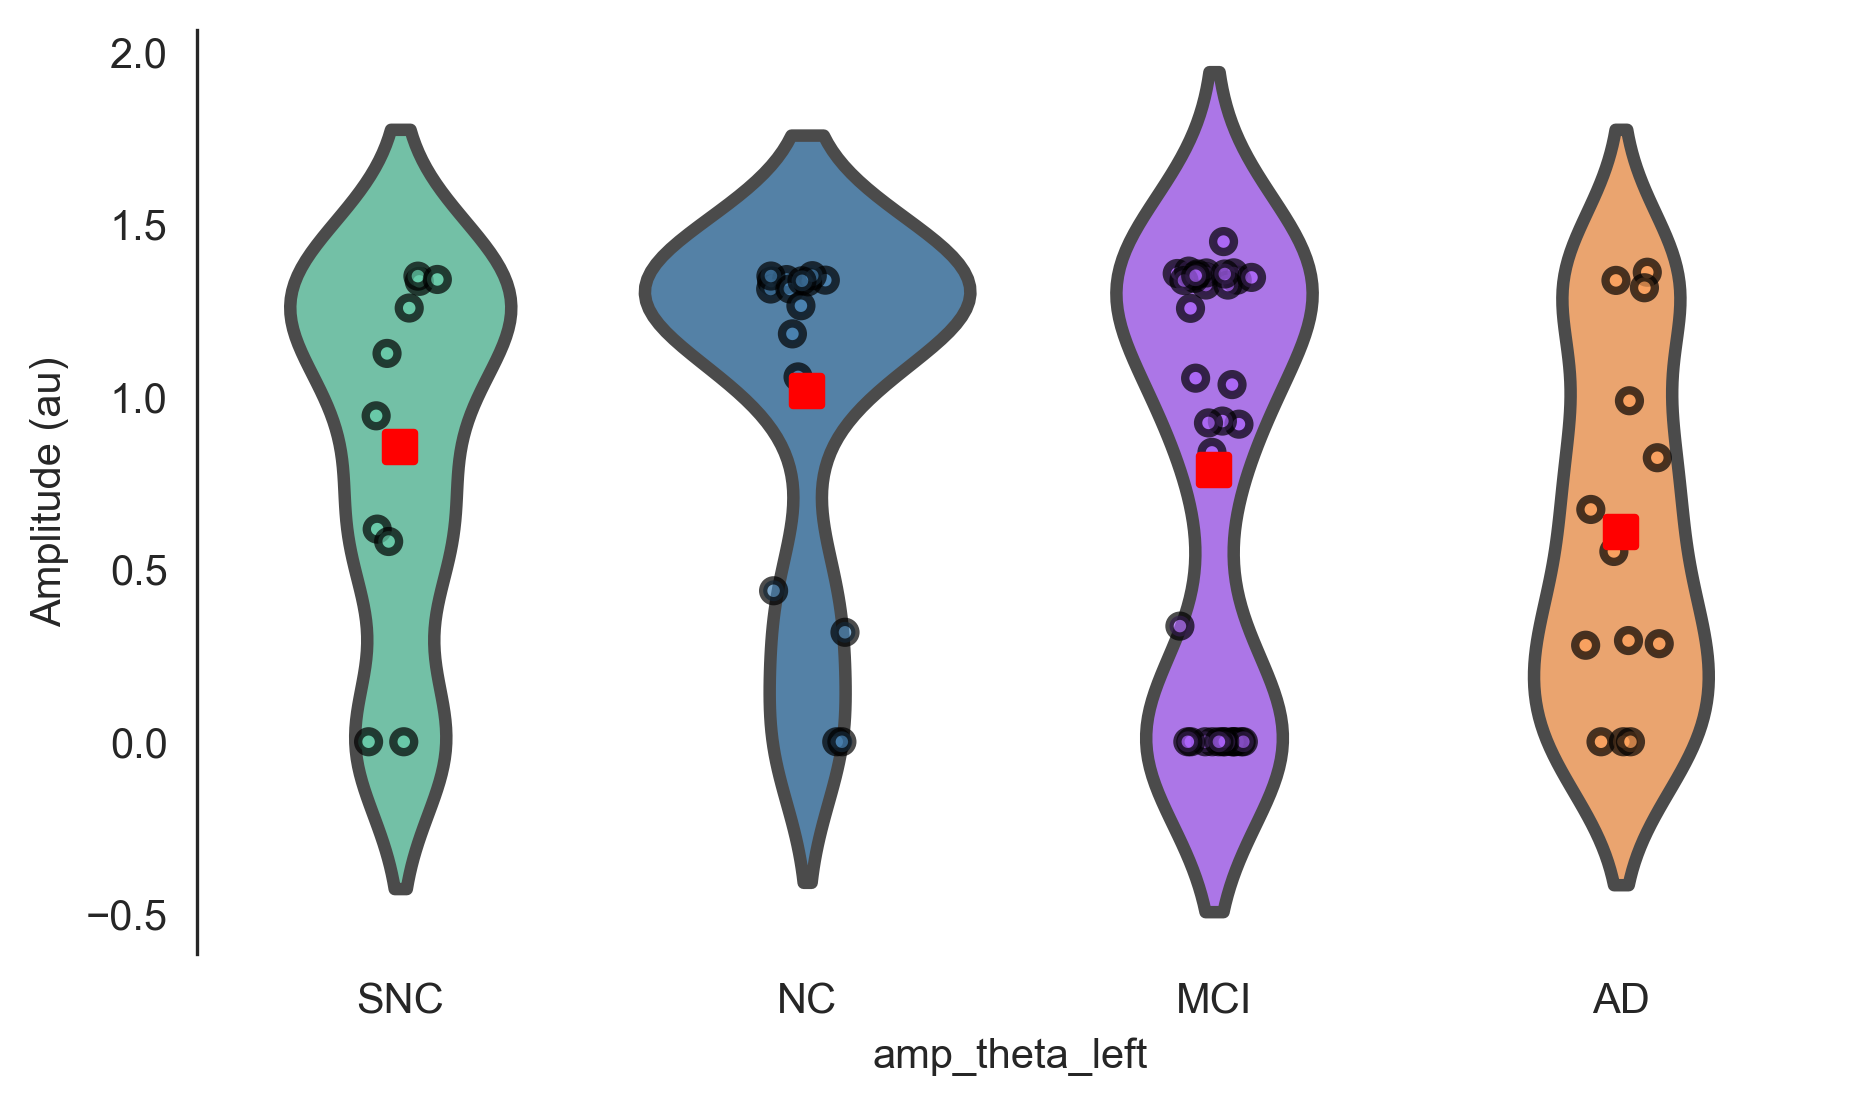

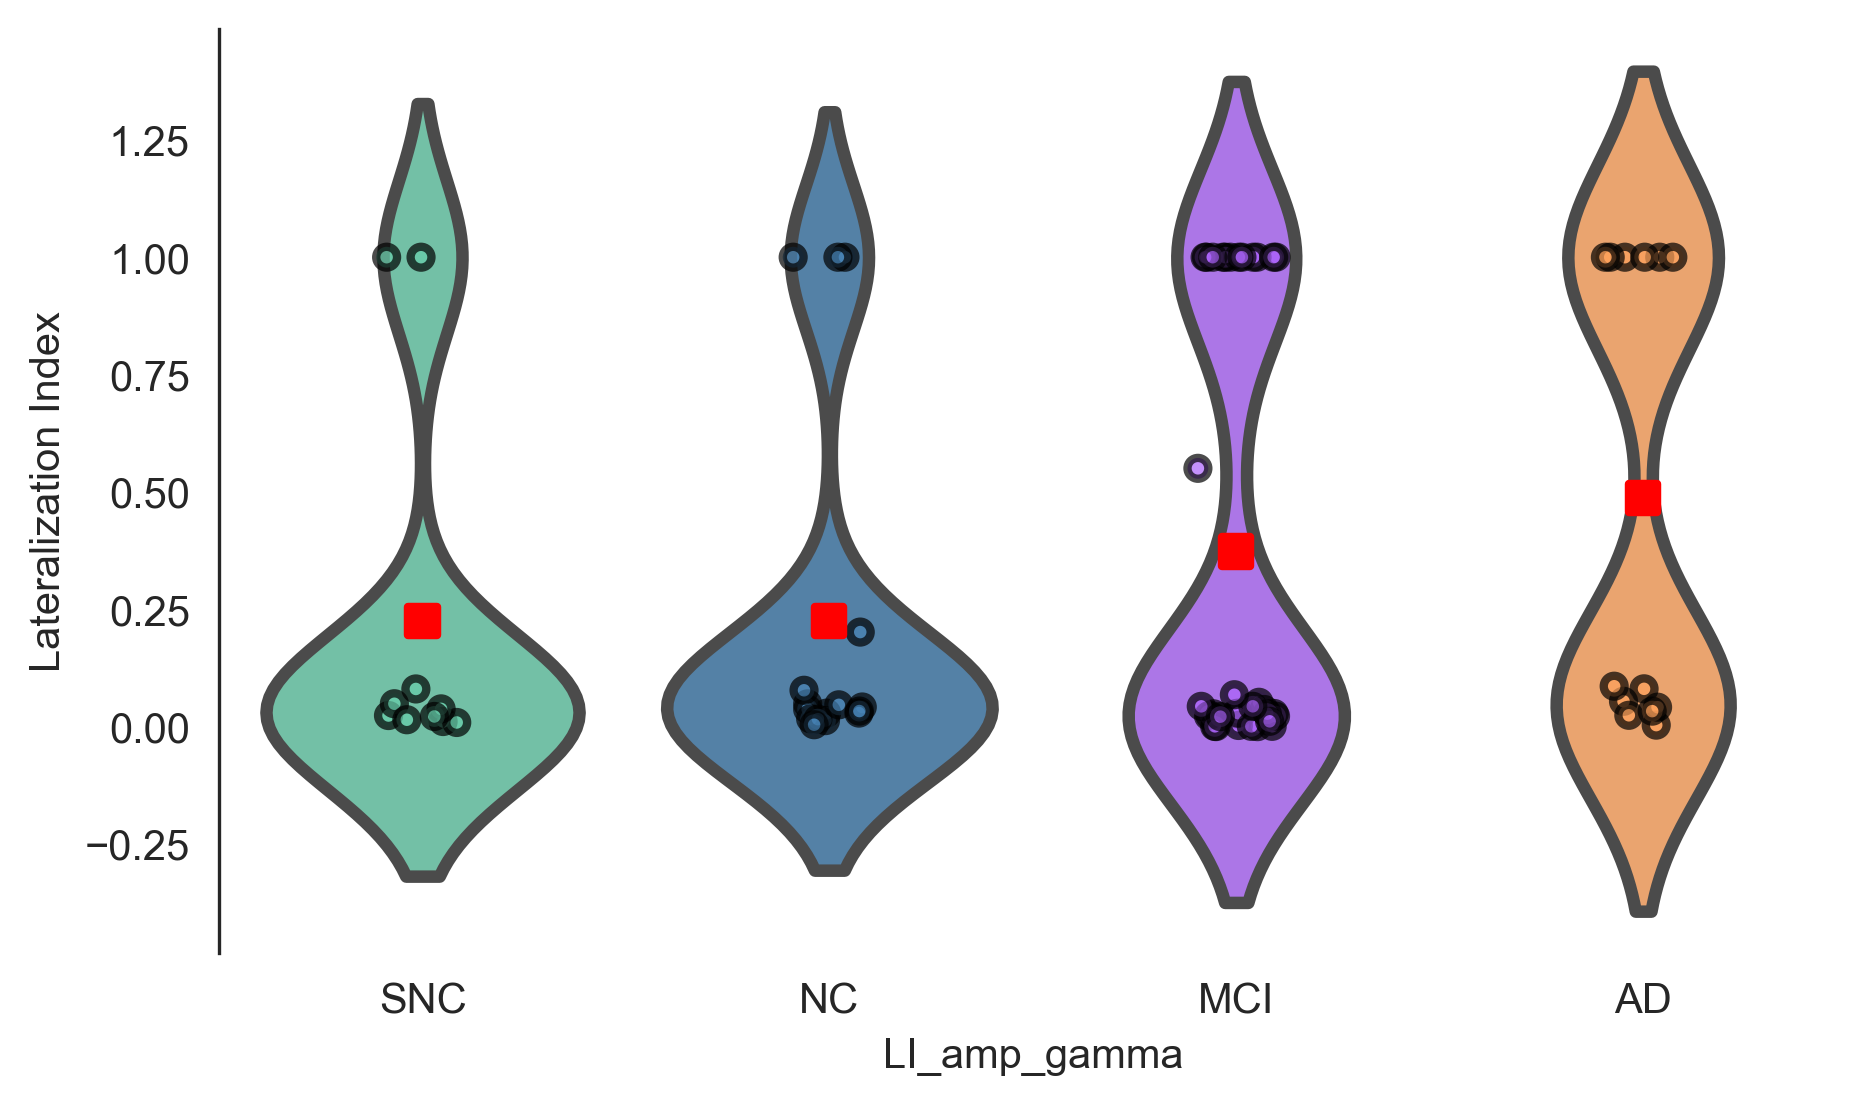

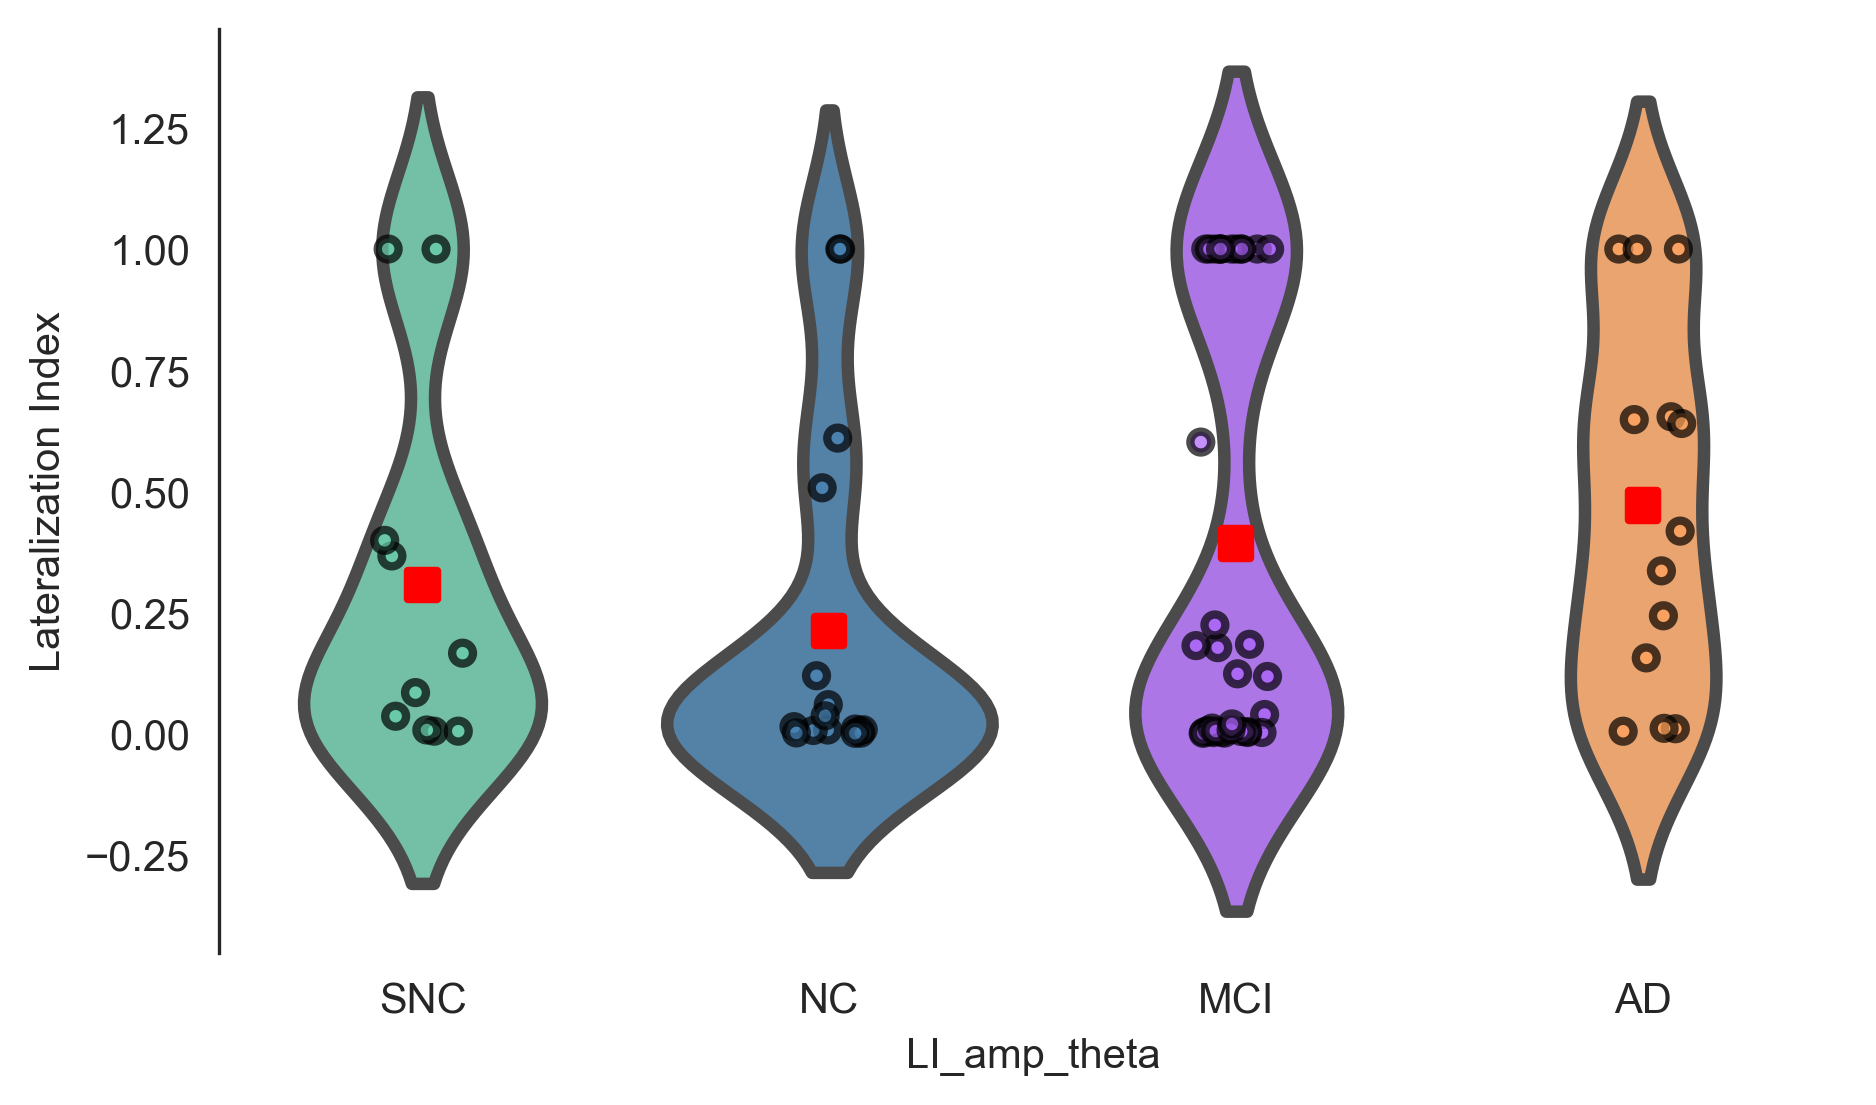

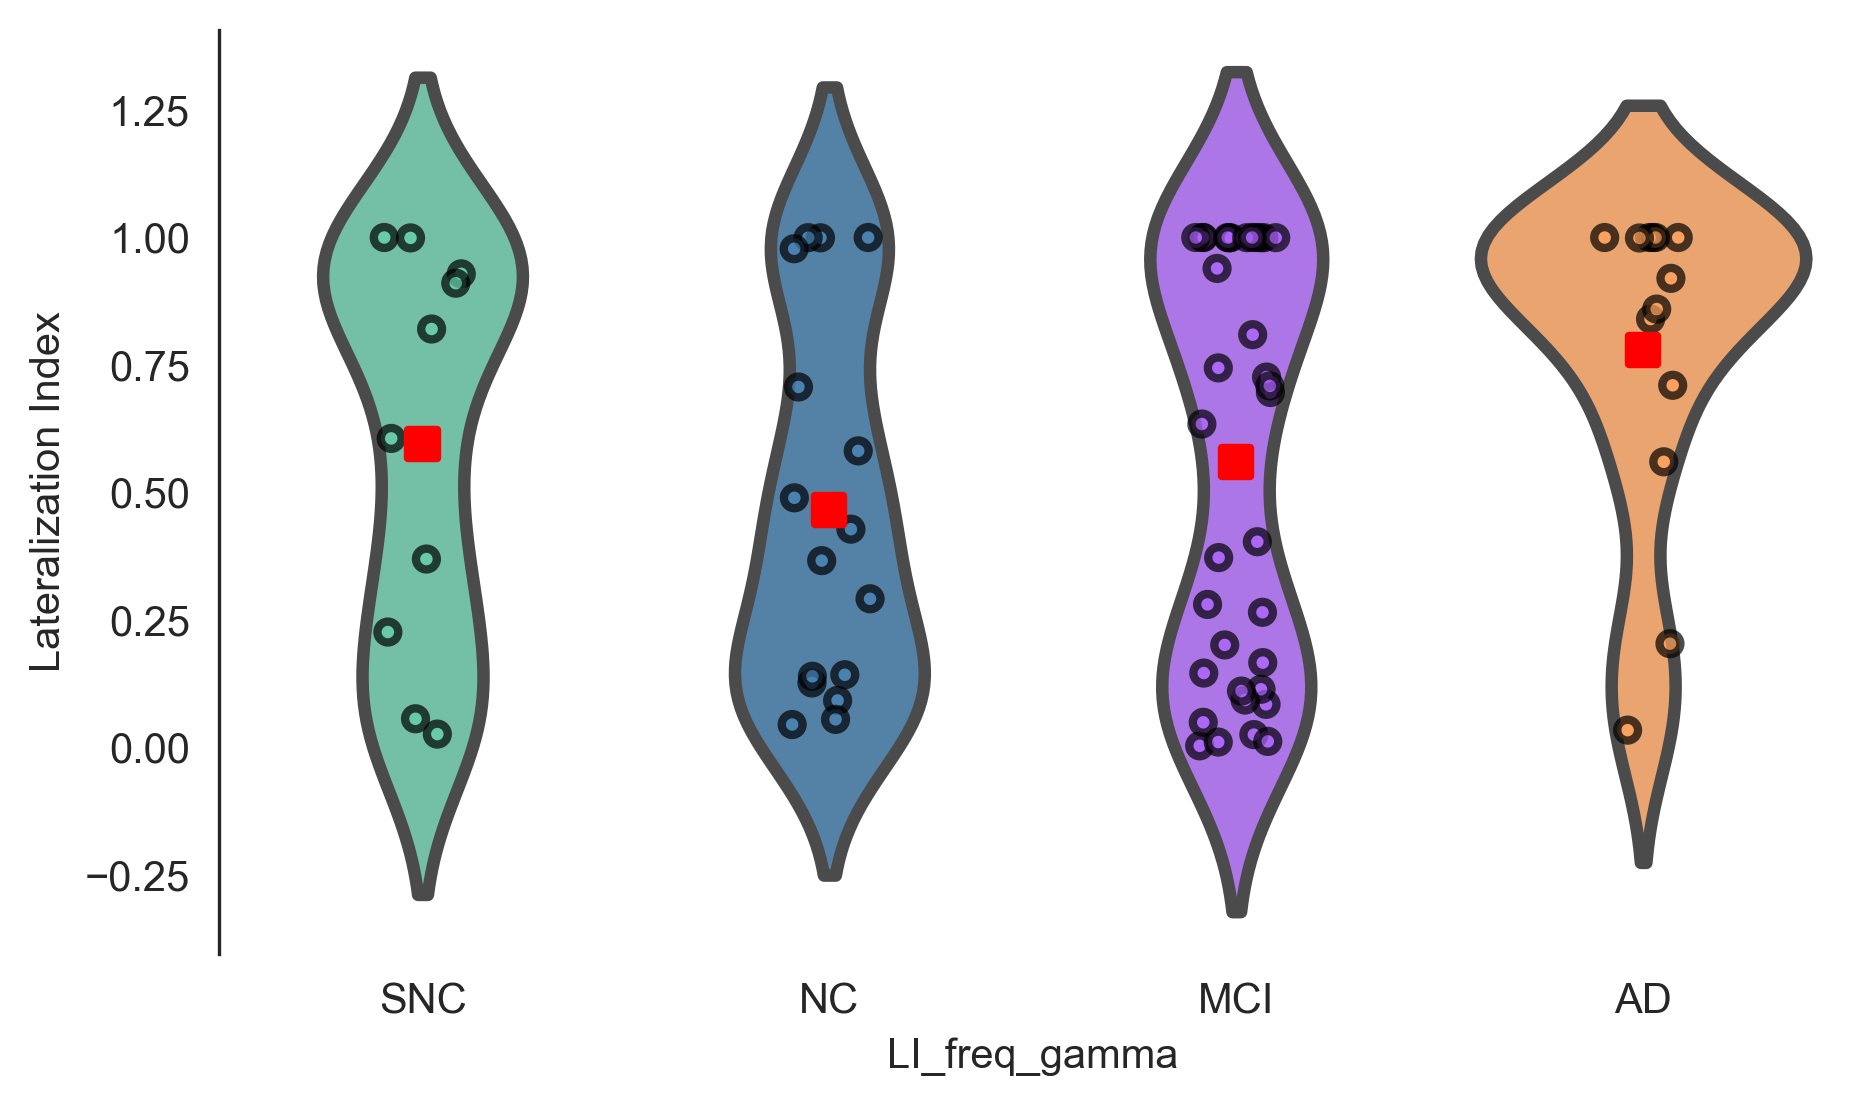

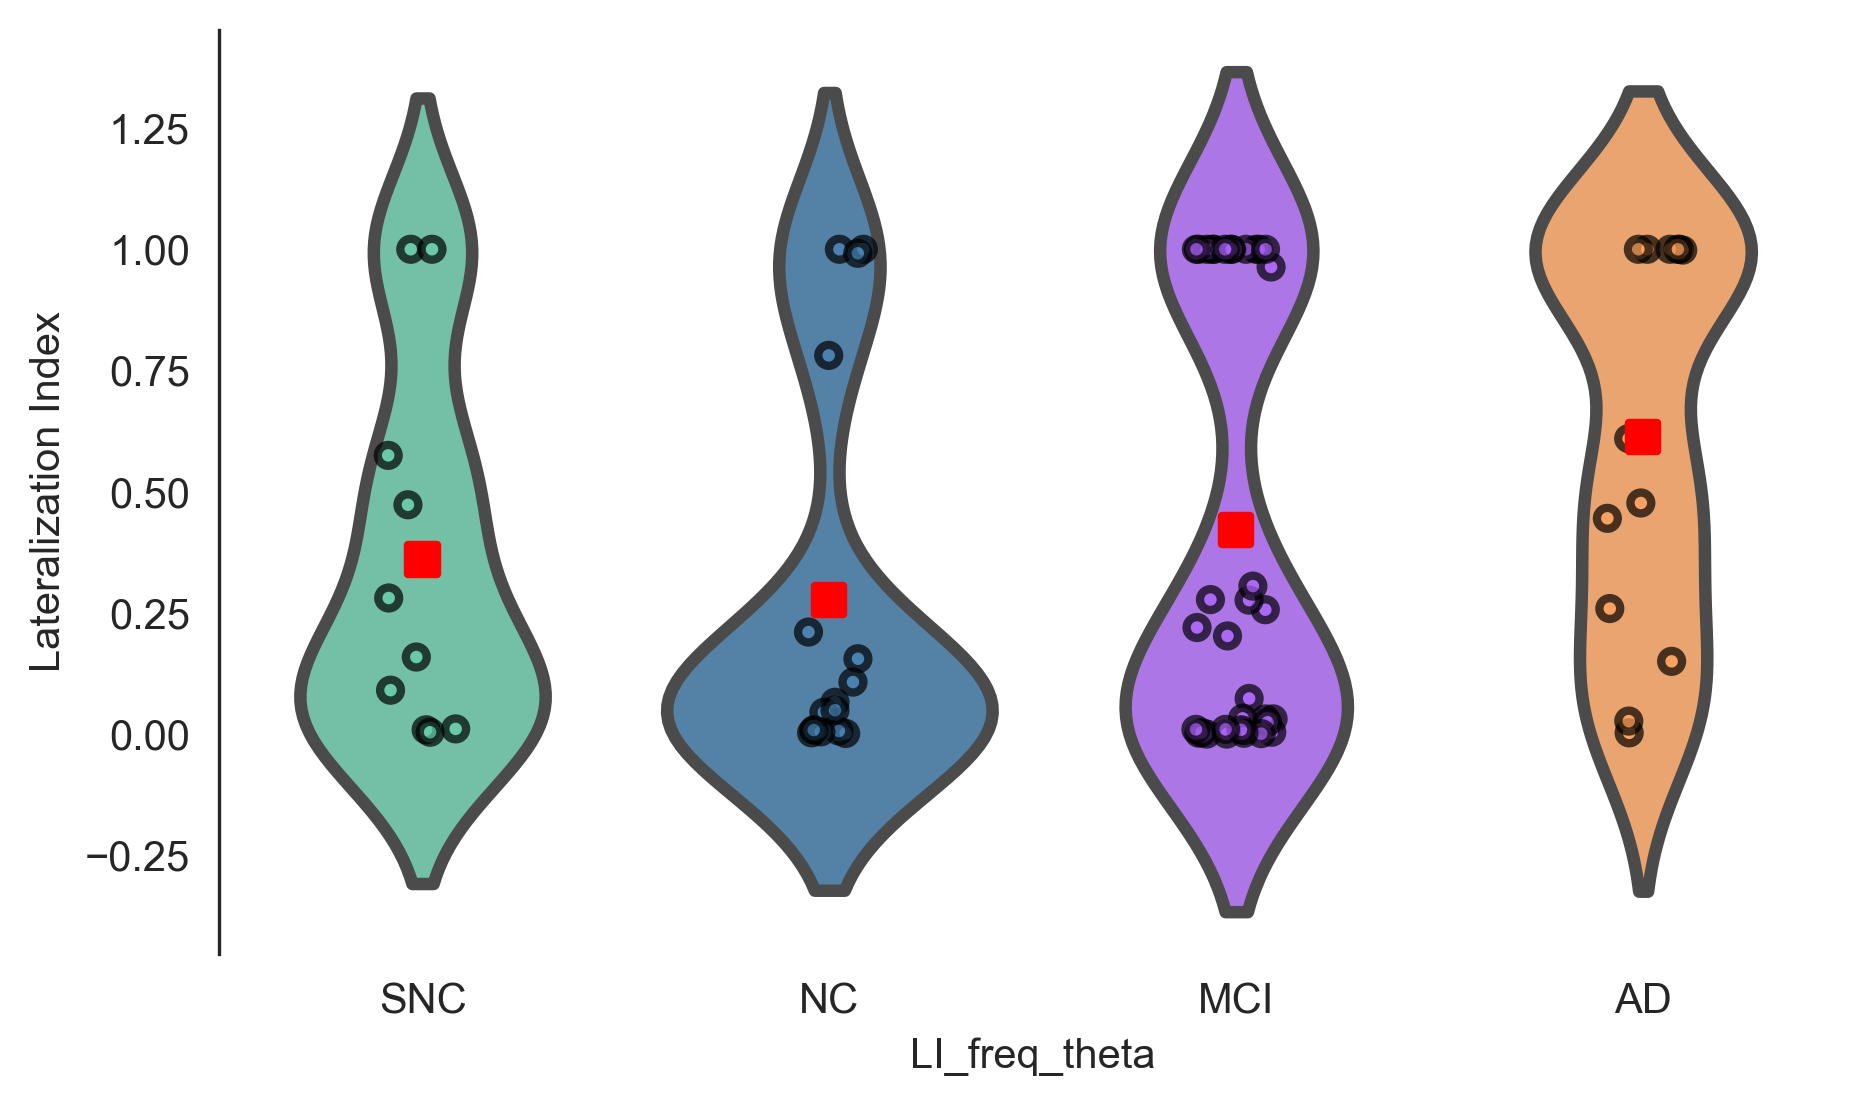

In [29]:
for i in range(len(freq3mins.columns)-2):
    violin_dot(freq3mins, "group", freq3mins.columns[i+2], stats_table=stats_freq, ylabel='Spiking Count (Hz)')
for i in range(len(delay3mins.columns)-2):
    violin_dot(delay3mins, "group", delay3mins.columns[i+2], stats_table=stats_delay, ylabel = 'Time Delay (ms)')
for i in range(len(amp3mins.columns)-2):
    violin_dot(amp3mins, "group", amp3mins.columns[i+2], stats_table=stats_amp, ylabel = 'Amplitude (au)')
for i in range(len(la3mins.columns)-2):
    violin_dot(la3mins, "group", la3mins.columns[i+2], stats_table=stats_la, ylabel = 'Lateralization Index')